In [58]:
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split


In [9]:
data_cc = pd.read_csv("/Users/we56sc/Analytics/DataSets/Credit_Card_Fraud/creditcard.csv")
data_taiwan = pd.read_csv("/Users/we56sc/Analytics/DataSets/Default_Of_Credit_Card_Clients/UCI_Credit_Card.csv")

In [11]:
data_taiwan.drop('ID', axis=1,inplace=True)

In [13]:
data_taiwan.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    data_taiwan.drop('default.payment.next.month', axis=1),
    data_taiwan['default.payment.next.month'], 
    test_size=0.33, 
    random_state=42
)

In [90]:
1./(2*X_train.shape[0]+0.001)

2.4875621271750718e-05

In [91]:
model = lgb.LGBMClassifier(
    boosting_type='dart',
    num_leaves=8,
    n_estimators=40,
    colsample_bytree = 1./(2*X_train.shape[1]+0.001)
#     bagging_fraction=0.5
).fit(
    X_train, y_train,
    categorical_feature=['SEX','EDUCATION','MARRIAGE']
)

/Users/we56sc/Developer/miniconda3/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['EDUCATION', 'MARRIAGE', 'SEX']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


In [102]:
pd.DataFrame(model.predict(X_train, pred_leaf=True))

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1,3,6,1,4,2,2,0,1,0,...,3,0,0,3,3,2,4,7,7,3
1,4,7,6,3,6,2,5,3,0,0,...,5,5,4,0,3,5,6,7,5,5
2,5,7,6,5,6,2,4,7,0,0,...,3,5,4,3,3,5,7,7,6,3
3,6,0,2,3,0,1,1,5,4,3,...,3,5,0,1,4,5,7,7,7,3
4,2,7,6,6,6,1,4,7,0,0,...,1,5,4,3,3,5,4,7,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20095,1,7,6,5,2,1,4,7,0,0,...,3,3,4,3,3,5,4,7,6,3
20096,4,3,2,4,4,2,2,3,0,3,...,5,5,4,1,4,5,5,4,1,5
20097,0,0,0,0,3,1,0,1,0,0,...,0,0,7,3,0,0,4,0,2,0
20098,5,7,3,6,6,5,0,7,0,0,...,3,5,4,3,4,5,2,1,1,3


In [97]:
model.predict(X_train, pred_contrib=True)

array([[ 0.026257  ,  0.01228849,  0.01622782, ..., -0.02674756,
        -0.00739703, -1.33437443],
       [ 0.19229897,  0.00542988, -0.02106388, ..., -0.10288781,
        -0.01960103, -1.33437443],
       [ 0.05270315, -0.00757381,  0.01560686, ...,  0.00771337,
         0.01479663, -1.33437443],
       ...,
       [ 0.03011456,  0.01261008, -0.01449671, ...,  0.03786804,
         0.01929907, -1.33437443],
       [ 0.0647297 , -0.0047018 ,  0.01275396, ...,  0.05774413,
        -0.00739703, -1.33437443],
       [-0.05774871, -0.00886506,  0.01304064, ..., -0.04438451,
         0.03592011, -1.33437443]])

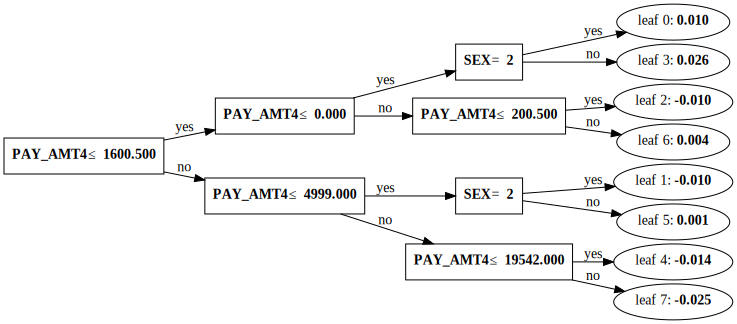

In [101]:
# fig,ax = plt.subplots(figsize=(15,30))
lgb.create_tree_digraph(model, tree_index=4)

### Try with the Python API

In [110]:
train_data = lgb.Dataset(
    X_train, 
    label=y_train, 
#     feature_name=['c1', 'c2', 'c3'], 
#     categorical_feature=['c3']
)
test_data = lgb.Dataset(
    X_test, 
    label=y_test, 
#     feature_name=['c1', 'c2', 'c3'], 
#     categorical_feature=['c3']
)

In [123]:
params = {
     "boosting_type":'gbdt',
    "num_leaves":8,
    "n_estimators":500,
    "colsample_bytree": 1./(2*X_train.shape[1]+0.001),
    'metric': 'auc'
}

num_round = 10
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data], verbose_eval=50)

[50]	valid_0's auc: 0.770148
[100]	valid_0's auc: 0.774852
[150]	valid_0's auc: 0.778374
[200]	valid_0's auc: 0.779246
[250]	valid_0's auc: 0.780127
[300]	valid_0's auc: 0.780158
[350]	valid_0's auc: 0.779368
[400]	valid_0's auc: 0.779033
[450]	valid_0's auc: 0.778616
[500]	valid_0's auc: 0.778076


In [124]:
params = {
     "boosting_type":'dart',
    "num_leaves":8,
    "n_estimators":500,
    "colsample_bytree": 1./(2*X_train.shape[1]+0.001),
    'metric': 'auc'
}

num_round = 10
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data], verbose_eval=50)

[50]	valid_0's auc: 0.765835
[100]	valid_0's auc: 0.767135
[150]	valid_0's auc: 0.774864
[200]	valid_0's auc: 0.773733
[250]	valid_0's auc: 0.777184
[300]	valid_0's auc: 0.77758
[350]	valid_0's auc: 0.778058
[400]	valid_0's auc: 0.779283
[450]	valid_0's auc: 0.779812
[500]	valid_0's auc: 0.780137


In [126]:
bst.dump_model().keys()

dict_keys(['name', 'version', 'num_class', 'num_tree_per_iteration', 'label_index', 'max_feature_idx', 'average_output', 'objective', 'feature_names', 'monotone_constraints', 'tree_info', 'pandas_categorical'])

# One feature model

In [128]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
16831,120000.0,1,3,1,49,0,-1,-1,-1,-1,...,2290.0,780.0,8190.0,4600.0,3844.0,2299.0,780.0,8190.0,4600.0,1081.0
4222,30000.0,1,1,2,38,2,0,0,0,0,...,62630.0,57406.0,46231.0,73262.0,4000.0,5000.0,8000.0,1460.0,40000.0,10000.0
8736,90000.0,2,2,2,39,0,0,0,0,0,...,42151.0,37842.0,30849.0,28061.0,2000.0,2000.0,1200.0,1018.0,1200.0,710.0
27880,130000.0,2,3,1,26,0,0,2,2,2,...,127881.0,133130.0,127159.0,131069.0,11000.0,2600.0,9000.0,0.0,6000.0,5000.0
29290,50000.0,1,3,2,26,2,0,0,0,0,...,42097.0,32394.0,16658.0,17006.0,2047.0,5728.0,1300.0,1194.0,617.0,650.0


In [157]:
model = lgb.LGBMClassifier(
    boosting_type='dart',
    num_leaves=8,
    n_estimators=1,
    colsample_bytree = 1./(2*X_train.shape[1]+0.001)
#     bagging_fraction=0.5
).fit(
    X_train[['EDUCATION']], y_train,
    categorical_feature=['EDUCATION']
)

/Users/we56sc/Developer/miniconda3/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['EDUCATION']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


In [158]:
X_bin = model.predict(X_train[['EDUCATION']], pred_leaf=True)

In [159]:
X_bin, y_train.values

(array([0, 1, 3, ..., 1, 3, 3], dtype=int32), array([1, 0, 1, ..., 0, 1, 1]))

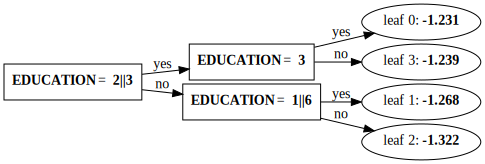

In [160]:
# fig,ax = plt.subplots(figsize=(15,30))
lgb.create_tree_digraph(model, tree_index=0)

In [152]:
model._Booster.dump_model()['tree_info'][0]['tree_structure'].keys()

dict_keys(['split_index', 'split_feature', 'split_gain', 'threshold', 'decision_type', 'default_left', 'missing_type', 'internal_value', 'internal_weight', 'internal_count', 'left_child', 'right_child'])